# Weather Analysis at Warsaw Chopin Airport (2022)

In this notebook, we analyze weather data from the file `12375-2022.csv` for Warsaw Chopin Airport for the year 2022. The goal of this analysis is to support anomaly detection in flight trajectories, e.g., by attempting to correlate detected anomalies with weather conditions.

## Weather Data Description

The data comes from the Meteostat service ([format documentation](https://dev.meteostat.net/formats.html#time-format)). It includes temperature, humidity, precipitation, wind direction and speed, pressure, cloud cover, and weather codes. Each record corresponds to one hour.

In [7]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
# Load weather data
weather_path = '../weather/12375-2022.csv'
weather = pd.read_csv(weather_path)
weather.head()

,year,month,day,hour,temp,temp_source,rhum,rhum_source,prcp,prcp_source,...,wspd,wspd_source,wpgt,wpgt_source,pres,pres_source,cldc,cldc_source,coco,coco_source
0,2022,1,1,0,10.0,isd_lite,95,isd_lite,NaN,NaN,...,18.0,isd_lite,33.3,dwd_mosmix,1010.3,isd_lite,8.0,isd_lite,7.0,dwd_poi
1,2022,1,1,1,9.7,isd_lite,97,isd_lite,NaN,NaN,...,18.0,isd_lite,33.3,dwd_mosmix,1011.1,isd_lite,8.0,isd_lite,7.0,dwd_mosmix
2,2022,1,1,2,9.6,isd_lite,97,isd_lite,NaN,NaN,...,10.8,isd_lite,31.5,dwd_mosmix,1011.8,isd_lite,8.0,isd_lite,7.0,dwd_mosmix
3,2022,1,1,3,9.5,isd_lite,94,isd_lite,NaN,NaN,...,14.4,isd_lite,33.3,dwd_mosmix,1012.3,isd_lite,8.0,isd_lite,7.0,dwd_mosmix
4,2022,1,1,4,9.0,isd_lite,94,isd_lite,NaN,NaN,...,18.0,isd_lite,33.3,dwd_mosmix,1013.0,isd_lite,8.0,isd_lite,4.0,dwd_mosmix


## Descriptive statistics and visualization of selected weather features

Below are basic statistics and plots for the most important weather features.

In [9]:
# Descriptive statistics
weather.describe()

,year,month,day,hour,temp,rhum,prcp,snwd,wdir,wspd,wpgt,pres,cldc,coco
count,8760.0,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,5260.000000,37.000000,8760.000000,8760.000000,8497.000000,8760.000000,8467.000000,8572.000000
mean,2022.0,6.526027,15.720548,11.500000,9.994840,73.100799,0.079468,5.351351,194.090868,12.181358,22.566706,1017.212272,5.321720,4.132641
std,0.0,3.448048,8.796749,6.922582,8.579097,19.337964,0.351354,5.893576,92.524389,6.947948,9.859359,9.140003,2.581203,4.139728
min,2022.0,1.000000,1.000000,0.000000,-12.900000,19.000000,0.000000,0.000000,0.000000,0.000000,5.500000,981.000000,0.000000,1.000000
25%,2022.0,4.000000,8.000000,5.750000,2.700000,59.000000,0.000000,1.000000,120.000000,7.200000,14.800000,1011.700000,3.000000,2.000000
50%,2022.0,7.000000,16.000000,11.500000,9.500000,77.000000,0.000000,2.000000,210.000000,10.800000,20.400000,1017.200000,6.000000,3.000000
75%,2022.0,10.000000,23.000000,17.250000,16.500000,90.000000,0.000000,12.000000,270.000000,14.400000,27.800000,1022.400000,7.000000,4.000000
max,2022.0,12.000000,31.000000,23.000000,35.200000,100.000000,5.700000,16.000000,360.000000,54.000000,75.900000,1047.100000,8.000000,25.000000


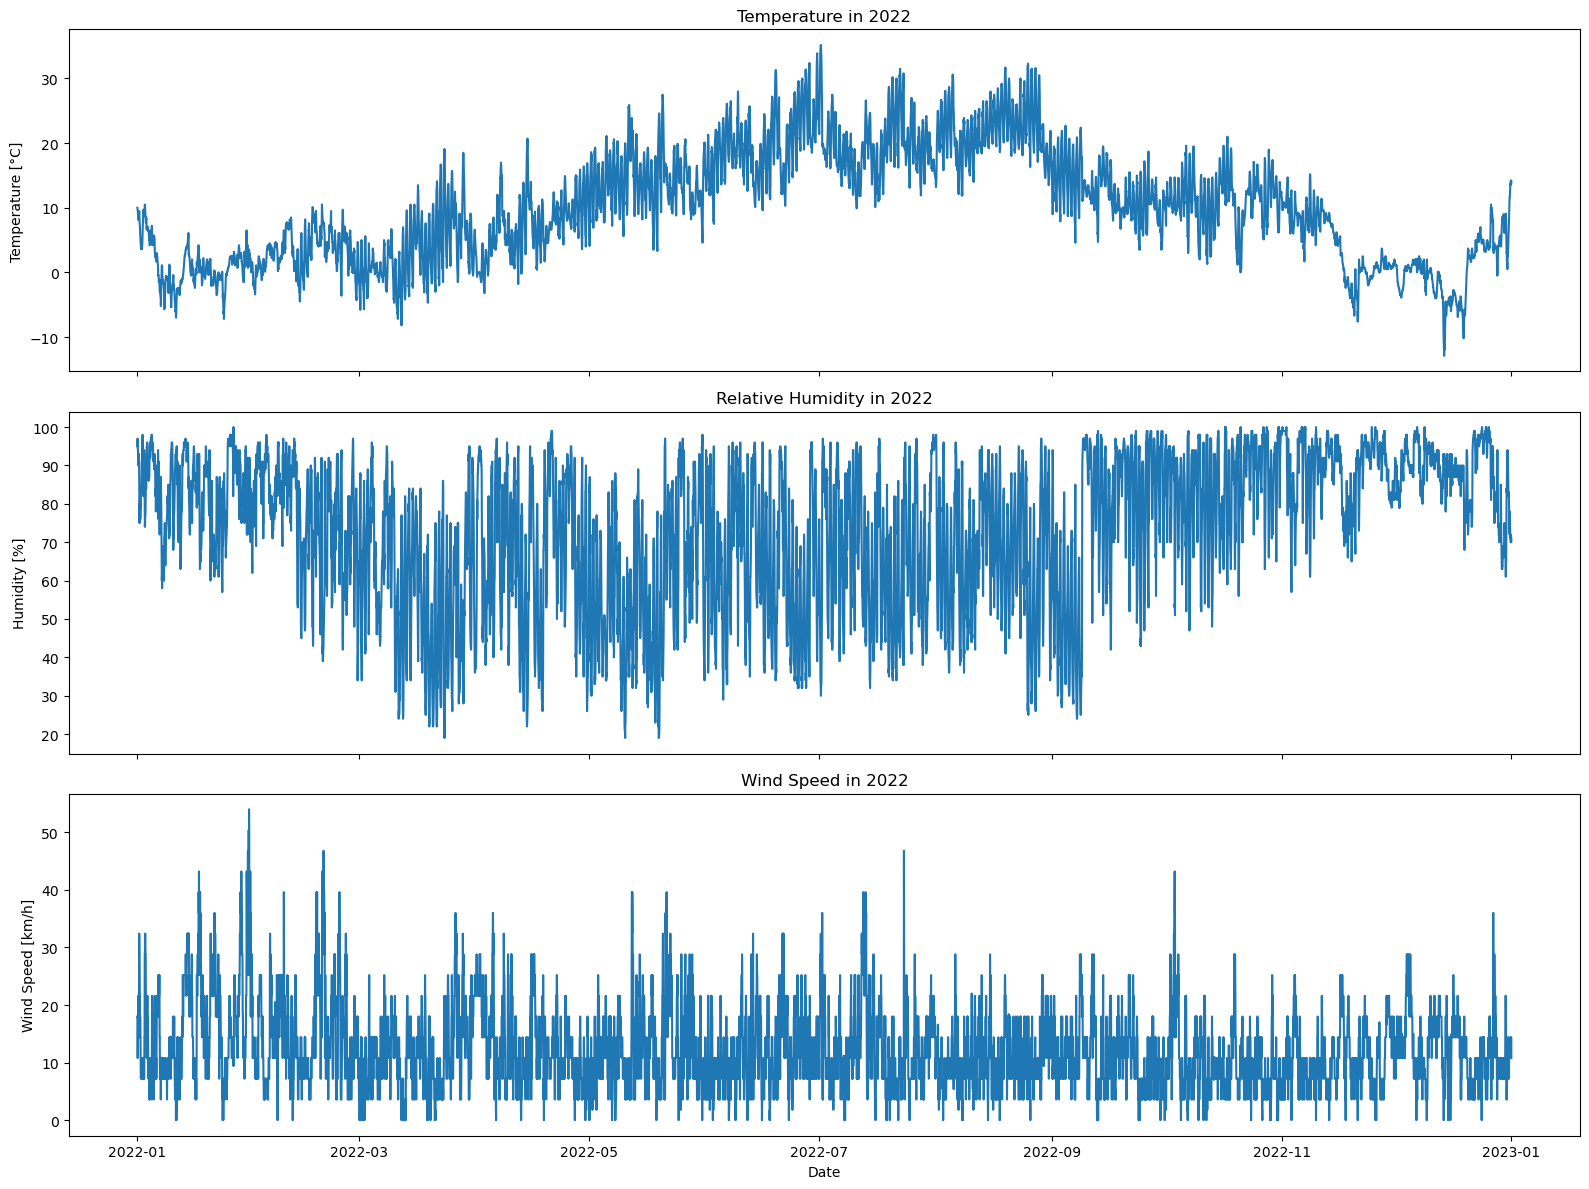

In [10]:
# Time series plots of selected features
fig, axs = plt.subplots(3, 1, figsize=(16, 12), sharex=True)
weather['datetime'] = pd.to_datetime(weather[['year', 'month', 'day', 'hour']])
axs[0].plot(weather['datetime'], weather['temp'])
axs[0].set_ylabel('Temperature [°C]')
axs[0].set_title('Temperature in 2022')
axs[1].plot(weather['datetime'], weather['rhum'])
axs[1].set_ylabel('Humidity [%]')
axs[1].set_title('Relative Humidity in 2022')
axs[2].plot(weather['datetime'], weather['wspd'])
axs[2].set_ylabel('Wind Speed [km/h]')
axs[2].set_title('Wind Speed in 2022')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

## Preliminary weather anomaly detection

A weather anomaly can be, for example, extreme values of temperature, wind speed, precipitation, or unusual combinations of these features. Below, we detect simple anomalies based on deviations from the mean (e.g., values above 3 standard deviations).

## Detailed weather analysis for aviation applications

In this section, we will focus on weather features most relevant to aviation, such as visibility, wind, precipitation, and weather codes (coco). The 'coco' column encodes specific weather phenomena (e.g., fog, rain, thunderstorm) that can significantly impact flight operations. We will analyze the frequency and seasonality of these conditions, as well as their relationship with other weather variables.

Weather condition frequency:
coco_name
Fair                 2445
Cloudy               1967
Overcast             1254
Clear                1102
Light Rain            641
Fog                   425
Light Snowfall        254
Rain Shower           145
Heavy Rain Shower     132
Thunderstorm           50
Snow Shower            49
Sleet                  43
Rain                   30
Freezing Rain          11
Sleet Shower           10
Heavy Rain              9
Snowfall                3
Lightning               2
Name: count, dtype: int64


<Axes: title={'center': 'Frequency of Weather Conditions (coco)'}, xlabel='coco_name'>

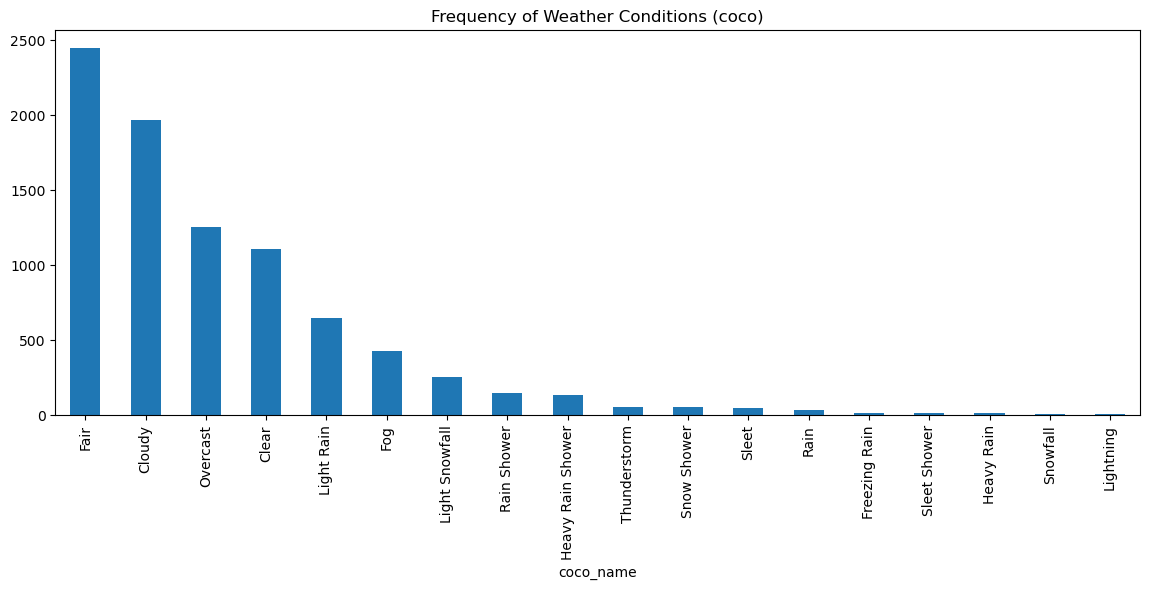

In [11]:
# Map 'coco' codes to weather condition names and analyze their frequency
coco_map = {
    1: 'Clear', 2: 'Fair', 3: 'Cloudy', 4: 'Overcast', 5: 'Fog', 6: 'Freezing Fog', 7: 'Light Rain', 8: 'Rain', 9: 'Heavy Rain',
    10: 'Freezing Rain', 11: 'Heavy Freezing Rain', 12: 'Sleet', 13: 'Heavy Sleet', 14: 'Light Snowfall', 15: 'Snowfall', 16: 'Heavy Snowfall',
    17: 'Rain Shower', 18: 'Heavy Rain Shower', 19: 'Sleet Shower', 20: 'Heavy Sleet Shower', 21: 'Snow Shower', 22: 'Heavy Snow Shower',
    23: 'Lightning', 24: 'Hail', 25: 'Thunderstorm', 26: 'Heavy Thunderstorm', 27: 'Storm'
}
weather['coco_name'] = weather['coco'].map(coco_map)
coco_counts = weather['coco_name'].value_counts().sort_values(ascending=False)
print('Weather condition frequency:')
print(coco_counts)
coco_counts.plot(kind='bar', figsize=(14,5), title='Frequency of Weather Conditions (coco)')

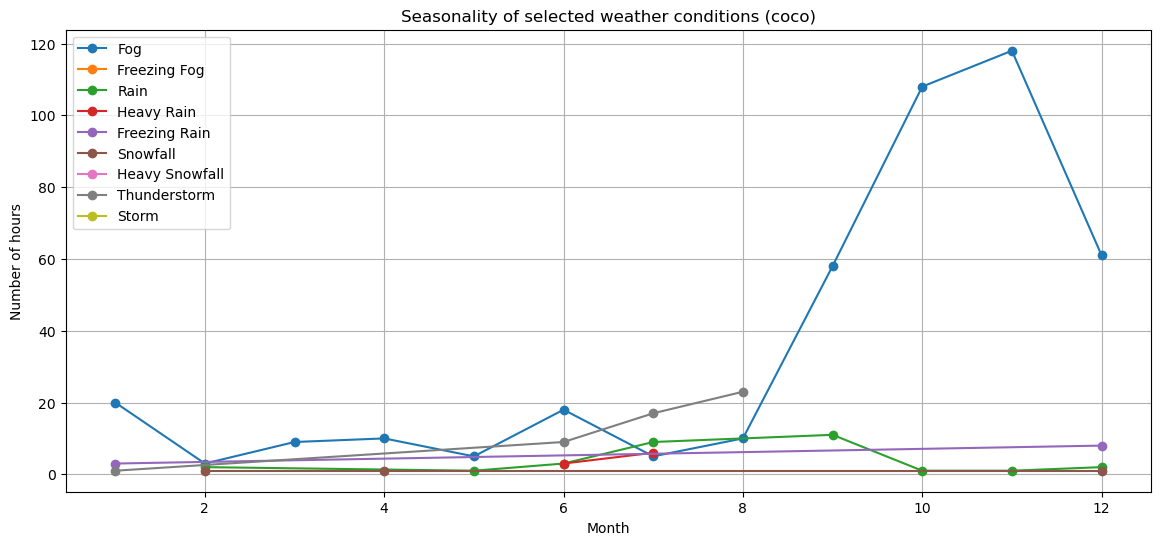

In [12]:
# Analyze seasonality of selected important weather conditions for aviation
aviation_important = ['Fog', 'Freezing Fog', 'Rain', 'Heavy Rain', 'Freezing Rain', 'Snowfall', 'Heavy Snowfall', 'Thunderstorm', 'Storm']
weather['month'] = weather['datetime'].dt.month
plt.figure(figsize=(14,6))
for cond in aviation_important:
    monthly = weather[weather['coco_name'] == cond].groupby('month').size()
    plt.plot(monthly.index, monthly.values, marker='o', label=cond)
plt.title('Seasonality of selected weather conditions (coco)')
plt.xlabel('Month')
plt.ylabel('Number of hours')
plt.legend()
plt.grid(True)
plt.show()

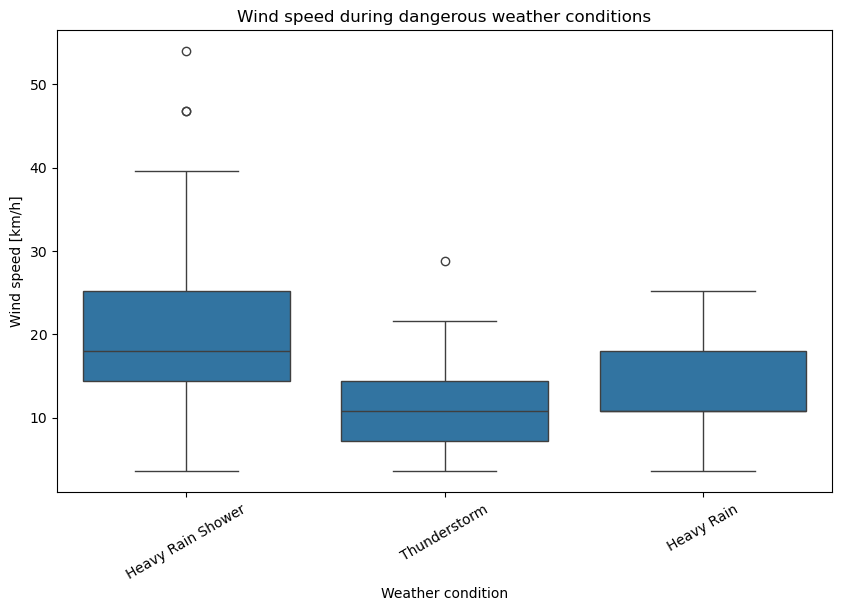

In [13]:
# Analyze wind speed during dangerous weather conditions
dangerous = ['Storm', 'Thunderstorm', 'Heavy Thunderstorm', 'Heavy Rain', 'Heavy Rain Shower']
dangerous_weather = weather[weather['coco_name'].isin(dangerous)]
plt.figure(figsize=(10,6))
sns.boxplot(x='coco_name', y='wspd', data=dangerous_weather)
plt.title('Wind speed during dangerous weather conditions')
plt.xlabel('Weather condition')
plt.ylabel('Wind speed [km/h]')
plt.xticks(rotation=30)
plt.show()

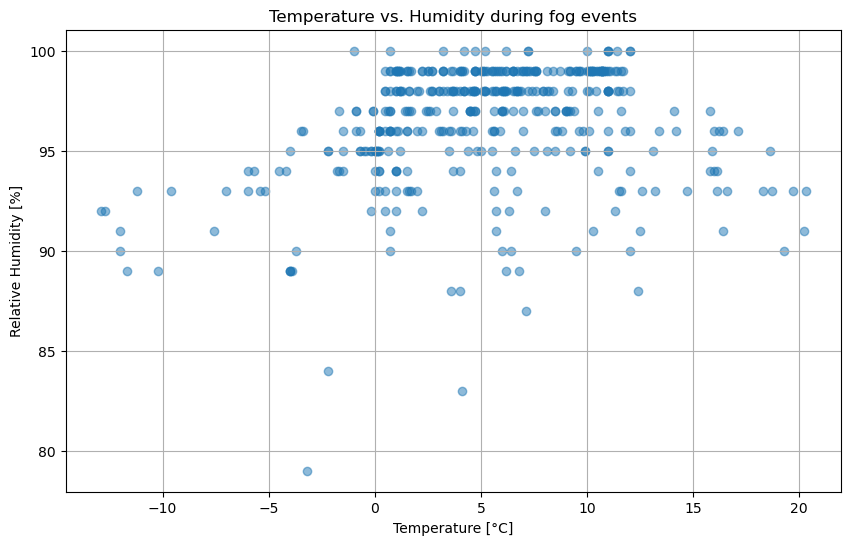

In [14]:
# Analyze fog occurrence and its relation to temperature and humidity
fog = weather[weather['coco_name'].isin(['Fog', 'Freezing Fog'])]
plt.figure(figsize=(10,6))
plt.scatter(fog['temp'], fog['rhum'], alpha=0.5)
plt.title('Temperature vs. Humidity during fog events')
plt.xlabel('Temperature [°C]')
plt.ylabel('Relative Humidity [%]')
plt.grid(True)
plt.show()

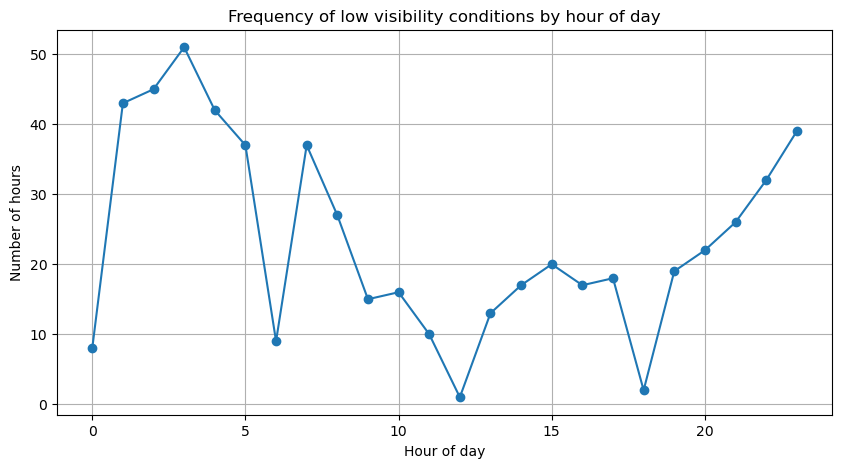

In [15]:
# Analyze frequency of low visibility conditions by hour of day
low_vis = weather[weather['coco_name'].isin(['Fog', 'Freezing Fog', 'Heavy Rain', 'Heavy Snowfall', 'Heavy Rain Shower', 'Heavy Snow Shower'])]
hourly = low_vis.groupby('hour').size()
plt.figure(figsize=(10,5))
plt.plot(hourly.index, hourly.values, marker='o')
plt.title('Frequency of low visibility conditions by hour of day')
plt.xlabel('Hour of day')
plt.ylabel('Number of hours')
plt.grid(True)
plt.show()

In [17]:
# Simple weather anomaly detection
def detect_anomalies(df, col, n_std=3):
    mean = df[col].mean()
    std = df[col].std()
    return df[(df[col] > mean + n_std*std) | (df[col] < mean - n_std*std)]

anomalies_temp = detect_anomalies(weather, 'temp')
anomalies_wspd = detect_anomalies(weather, 'wspd')
print(f'Number of temperature anomalies: {len(anomalies_temp)}')
print(f'Number of wind speed anomalies: {len(anomalies_wspd)}')

Number of temperature anomalies: 0
Number of wind speed anomalies: 74
